In [49]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [50]:
data = pd.read_csv('train.csv')
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [51]:
NumericData = data[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']].copy()



In [52]:
NumericData.columns
NumericData.describe(
)

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137
std,9981.264932,525.480383,438.705324,213.804841
min,1300.000000,334.000000,0.000000,0.000000
25%,7553.500000,1129.500000,795.750000,334.500000
50%,9478.500000,1464.000000,991.500000,480.000000
75%,11601.500000,1776.750000,1298.250000,576.000000
max,215245.000000,5642.000000,6110.000000,1418.000000


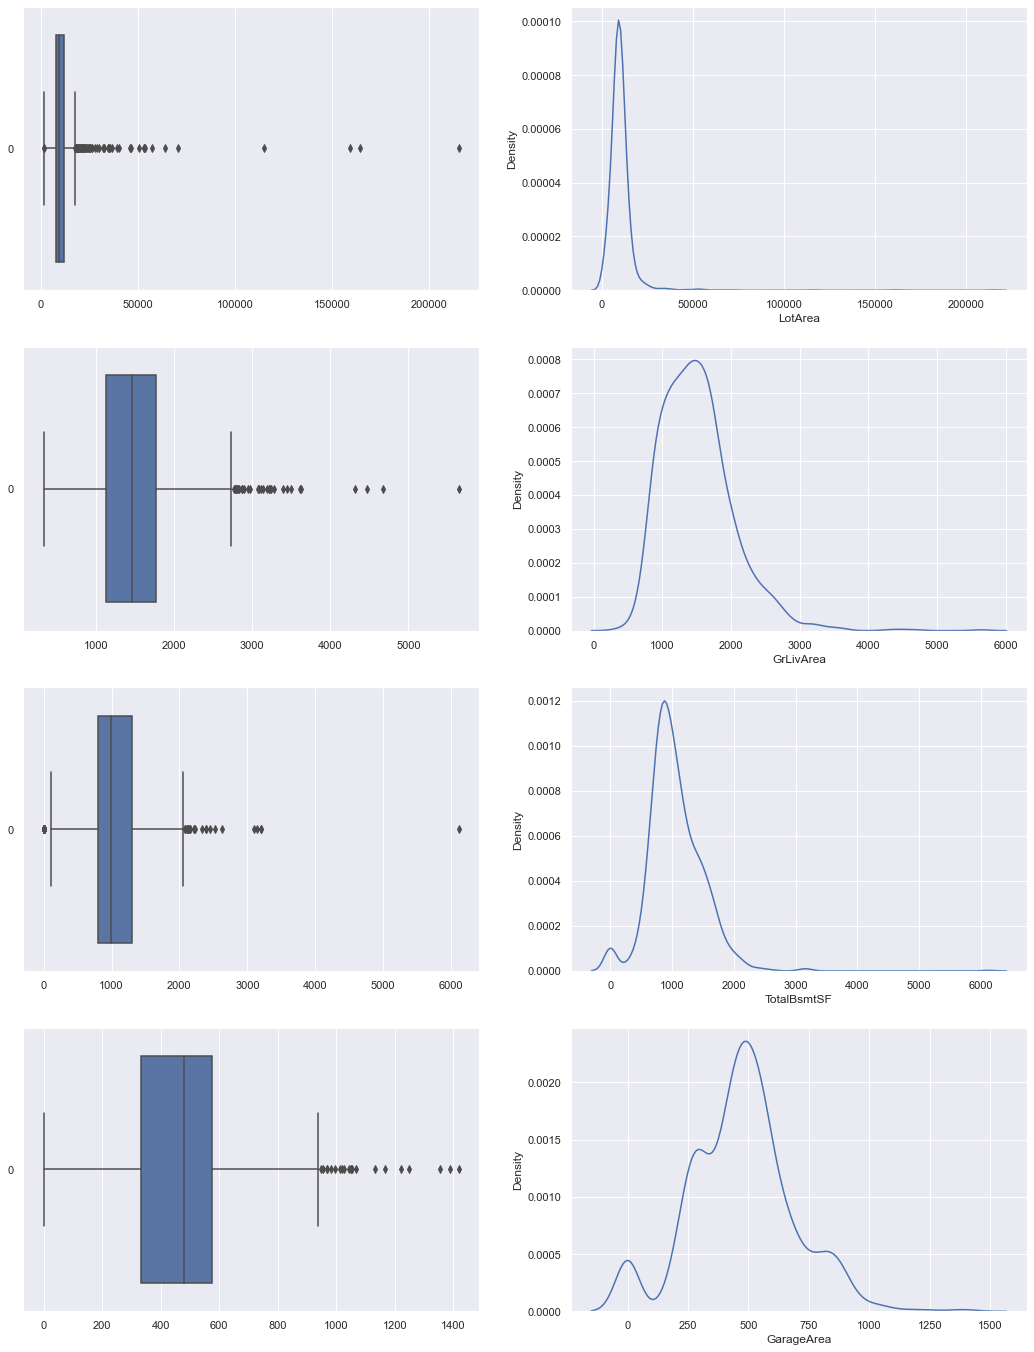

In [53]:
f, axes = plt.subplots(4, 2, figsize=(18, 24))

count = 0
for var in NumericData:
    sb.boxplot(data = NumericData[var], orient = "h",ax=axes[count,0])
    sb.kdeplot(data = NumericData[var],ax=axes[count,1])
    count+=1


   



In [54]:
    Q1 = NumericData.quantile(0.25)
    Q3 = NumericData.quantile(0.75)
    IQR = Q3 - Q1
    ((NumericData < (Q1 - 1.5 * IQR)) | (NumericData > (Q3 + 1.5 * IQR))).sum()

    
    
    
    


LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
dtype: int64

LotArea has the highest number of outliers and its 69

In [55]:
NumericData.skew(axis = 0, skipna = True)

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
dtype: float64

All are postively skewed  and LotArea being the the most skewed with 12.207688

In [56]:
SalesData= data['SalePrice']
join = pd.concat([SalesData, NumericData], axis = 1).reindex(SalesData.index)
join.corr()

,SalePrice,LotArea,GrLivArea,TotalBsmtSF,GarageArea
SalePrice,1.000000,0.263843,0.708624,0.613581,0.623431
LotArea,0.263843,1.000000,0.263116,0.260833,0.180403
GrLivArea,0.708624,0.263116,1.000000,0.454868,0.468997
TotalBsmtSF,0.613581,0.260833,0.454868,1.000000,0.486665
GarageArea,0.623431,0.180403,0.468997,0.486665,1.000000


The two strongest predictors of Sales Price are GrLivArea and GarageArea with correalation of 0.71 and 0.62

In [57]:
CatData = data[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']].copy()

In [58]:
CatData.columns

Index(['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual'], dtype='object')

In [59]:
CatData.nunique(axis=0)
    


MSSubClass      15
Neighborhood    25
BldgType         5
OverallQual     10
dtype: int64

Neighbourhood has the highes levels of 25

In [60]:
CatData['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Names has highest number of houses

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

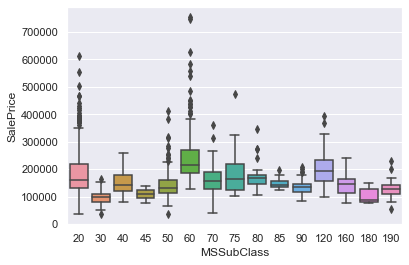

In [61]:
sb.boxplot(x='MSSubClass',y = SalesData, data= CatData) 
#Get the Answer to which two variables used to predict


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

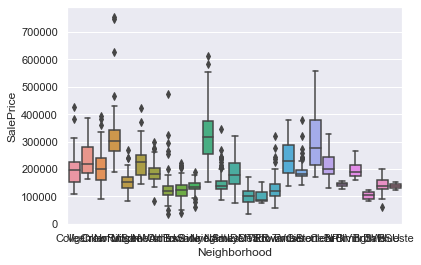

In [62]:
sb.boxplot(x='Neighborhood',y = SalesData, data= CatData)


<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

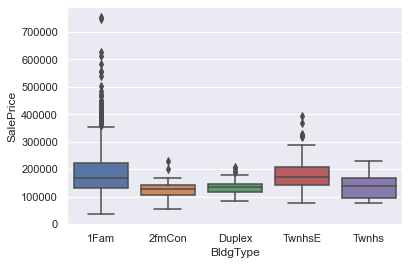

In [63]:
sb.boxplot(x='BldgType',y = SalesData, data= CatData)


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

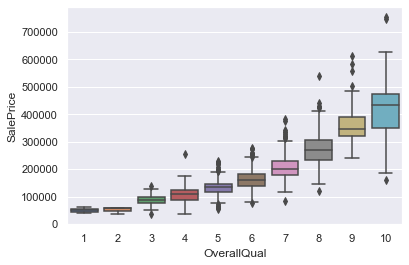

In [64]:
sb.boxplot(x='OverallQual',y = SalesData, data= CatData)

In [65]:
#fill na values
data['GarageType']=data['GarageType'].fillna(0) 



Based on the box plots, Overall Quality and Neighbourhood are the determining predictor for Sales Price. As for Quality, when it rises, the SalesPrice median rises too. For Neighbourhood, as you can see the median rises for different areas stating which areas are the affluent neighbourhood.

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

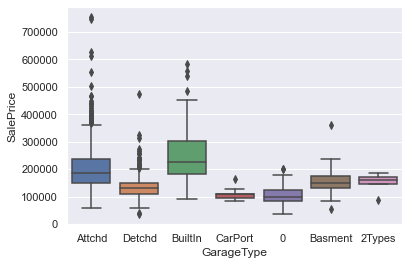

In [66]:
sb.boxplot(x='GarageType',y = SalesData, data=data)

Yes, it does. Having a garage, the median of the houses with no garage is the lesser compared to those with hence it affects the sales prices